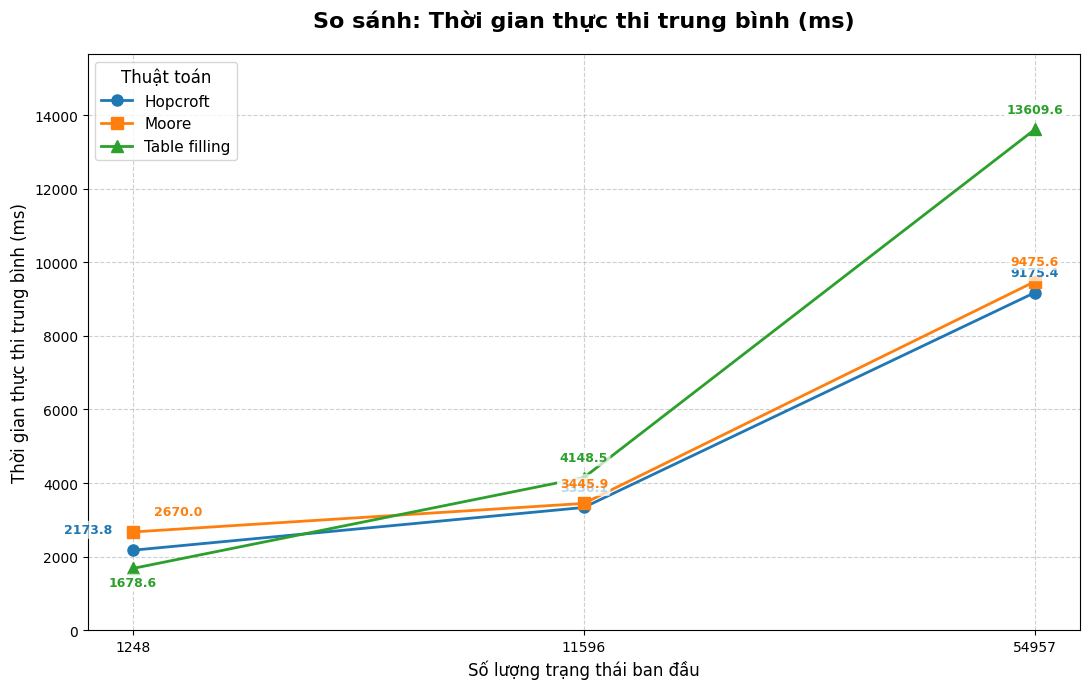

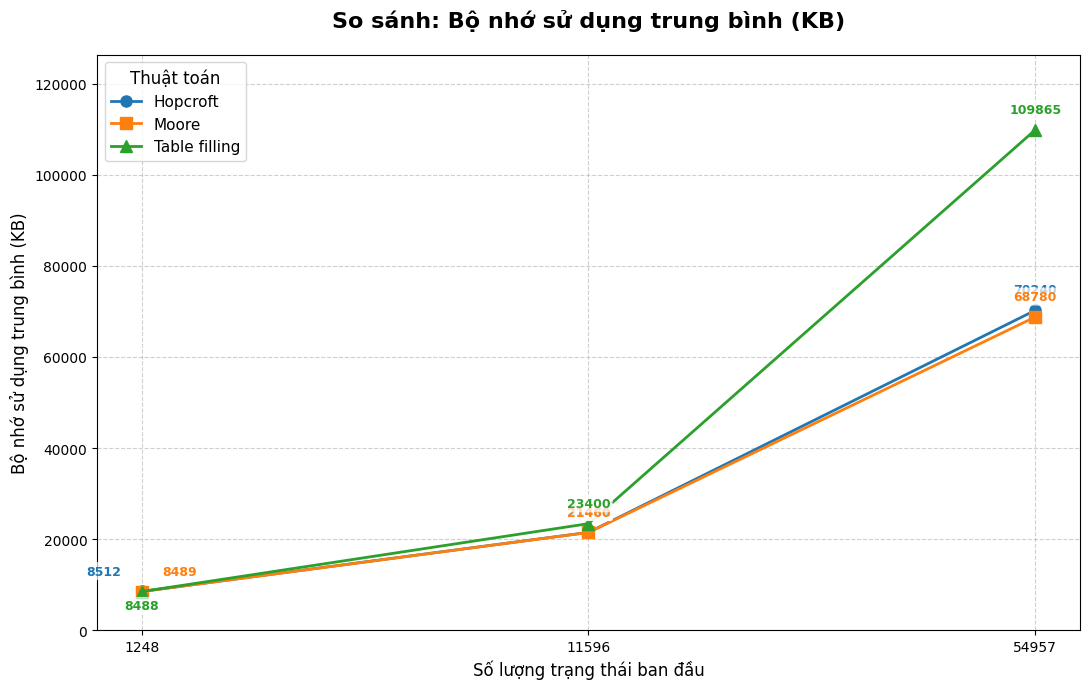

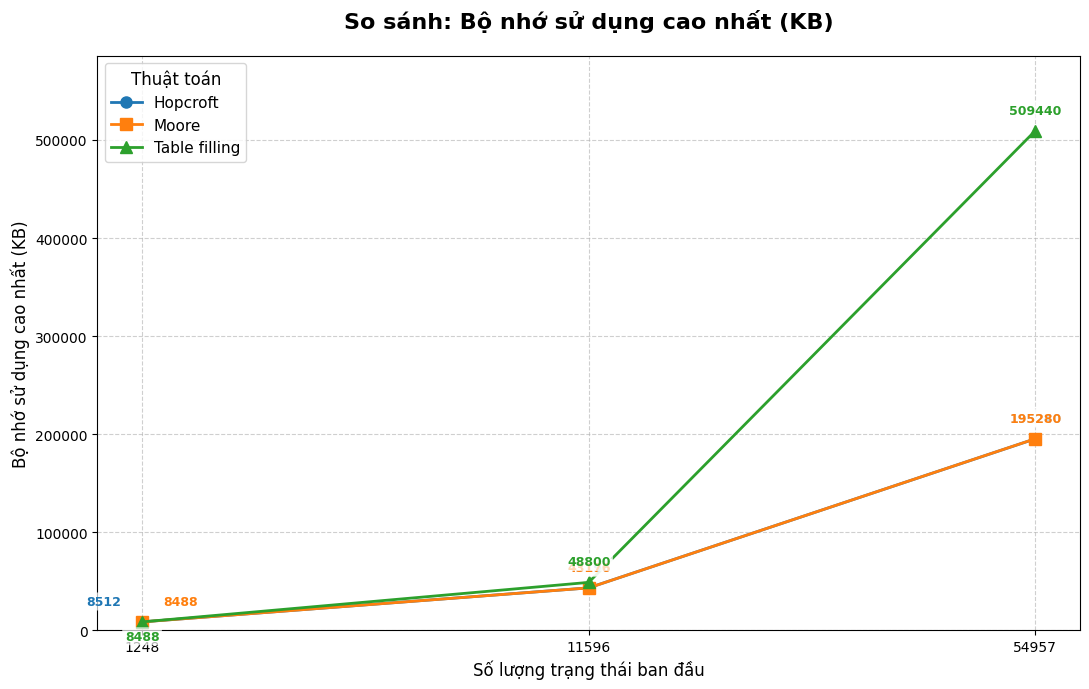

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1. Chuẩn bị dữ liệu ---
data = {
    'Input_Size': ['1248', '11596', '54957'] * 3,
    'Algorithm': ['Hopcroft']*3 + ['Moore']*3 + ['Table filling']*3,
    'Time_ms': [2173.85, 3336.12, 9175.41, 
                2669.96, 3445.87, 9475.63, 
                1678.56, 4148.50, 13609.61],
    'Avg_Mem_KB': [8512.35, 21480.74, 70240.12, 
                   8488.96, 21460.28, 68780.48, 
                   8488.22, 23400.39, 109864.90],
    'Max_Mem_KB': [8512, 43196, 195240, 
                   8488, 43176, 195280, 
                   8488, 48800, 509440]
}

df = pd.DataFrame(data)

# Cấu hình các chỉ số cần vẽ
metrics_config = [
    ('Time_ms', 'Thời gian thực thi trung bình (ms)', '{:.1f}'), 
    ('Avg_Mem_KB', 'Bộ nhớ sử dụng trung bình (KB)', '{:.0f}'), 
    ('Max_Mem_KB', 'Bộ nhớ sử dụng cao nhất (KB)', '{:.0f}')
]

algorithms = ['Hopcroft', 'Moore', 'Table filling']
markers = ['o', 's', '^'] 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 

x_labels = ['1248', '11596', '54957']
x_indices = np.arange(len(x_labels))

# --- 2. Hàm hỗ trợ thêm nhãn số (Annotation) ---
def add_annotations(ax, x_idx, y_val, text_format, algo_name, color):
    # Định dạng số (ví dụ: 1 số lẻ hoặc số nguyên)
    label_text = text_format.format(y_val)
    
    # Mặc định: chữ nằm trên điểm một chút
    xytext_offset = (0, 10) 
    ha_align = 'center'

    # Tinh chỉnh thủ công để tránh chồng chéo ở điểm đầu tiên (Input 1248)
    # nơi các giá trị rất gần nhau
    if x_idx == 0:
        if algo_name == 'Hopcroft':
            xytext_offset = (-15, 10) # Lệch sang trái lên trên
            ha_align = 'right'
        elif algo_name == 'Moore':
            xytext_offset = (15, 10) # Lệch sang phải lên trên
            ha_align = 'left'
        elif algo_name == 'Table filling':
            xytext_offset = (0, -15) # Lệch xuống dưới
            ha_align = 'center'

    ax.annotate(label_text,
                 xy=(x_idx, y_val), # Vị trí điểm dữ liệu
                 xytext=xytext_offset,  # Độ lệch của chữ so với điểm (tính bằng points)
                 textcoords='offset points',
                 ha=ha_align,
                 va='bottom',
                 fontsize=9,
                 color=color,
                 fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7) # Hộp nền trắng mờ để dễ đọc
                 )

# --- 3. Vẽ từng biểu đồ riêng biệt ---
for metric_col, metric_title, fmt in metrics_config:
    fig, ax = plt.subplots(figsize=(11, 7)) # Tăng chiều cao một chút để chứa nhãn
    
    # Tìm giá trị max để thiết lập giới hạn trục Y cho thoáng
    max_y_value = df[metric_col].max()
    ax.set_ylim(0, max_y_value * 1.15) # Thêm 15% khoảng trống phía trên

    for i, algo in enumerate(algorithms):
        subset = df[df['Algorithm'] == algo]
        y_values = subset[metric_col].values
        
        # Vẽ đường
        ax.plot(x_indices, y_values, 
                 marker=markers[i], 
                 label=algo, 
                 color=colors[i], 
                 linewidth=2, 
                 markersize=8)
        
        # Thêm nhãn số cho từng điểm
        for x_idx, y_val in zip(x_indices, y_values):
            add_annotations(ax, x_idx, y_val, fmt, algo, colors[i])
            
    # Trang trí biểu đồ
    ax.set_title(f"So sánh: {metric_title}", fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel("Số lượng trạng thái ban đầu", fontsize=12)
    ax.set_ylabel(metric_title, fontsize=12)
    ax.set_xticks(x_indices)
    ax.set_xticklabels(x_labels)
    
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(title='Thuật toán', fontsize=11, title_fontsize=12, loc='best')
    
    plt.tight_layout()
    plt.show()

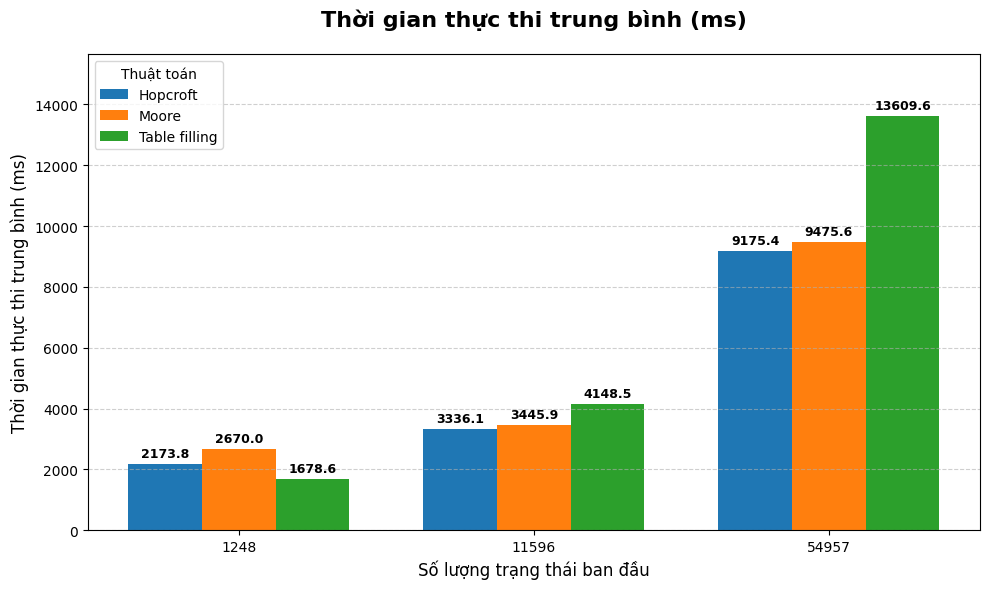

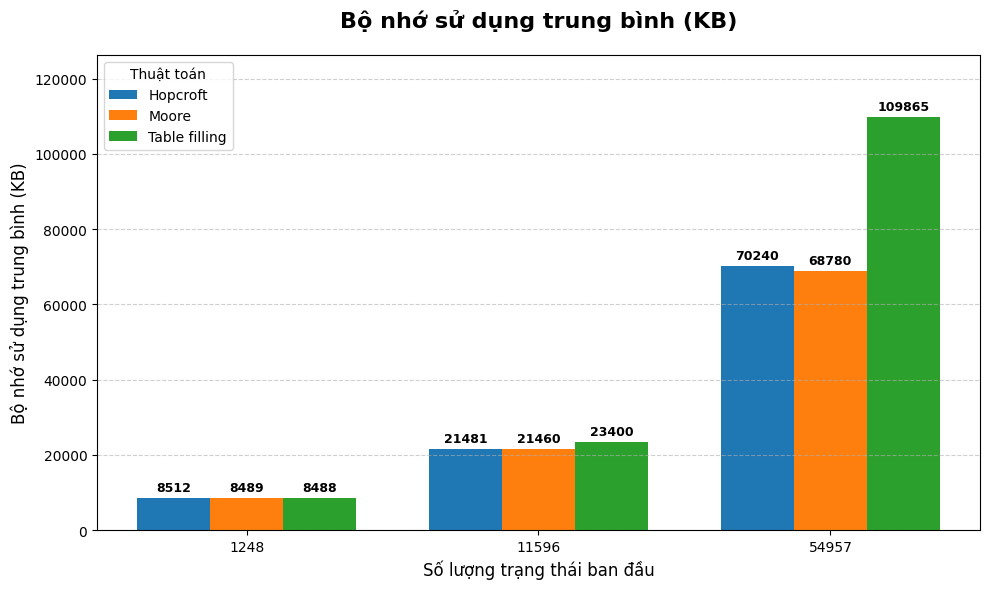

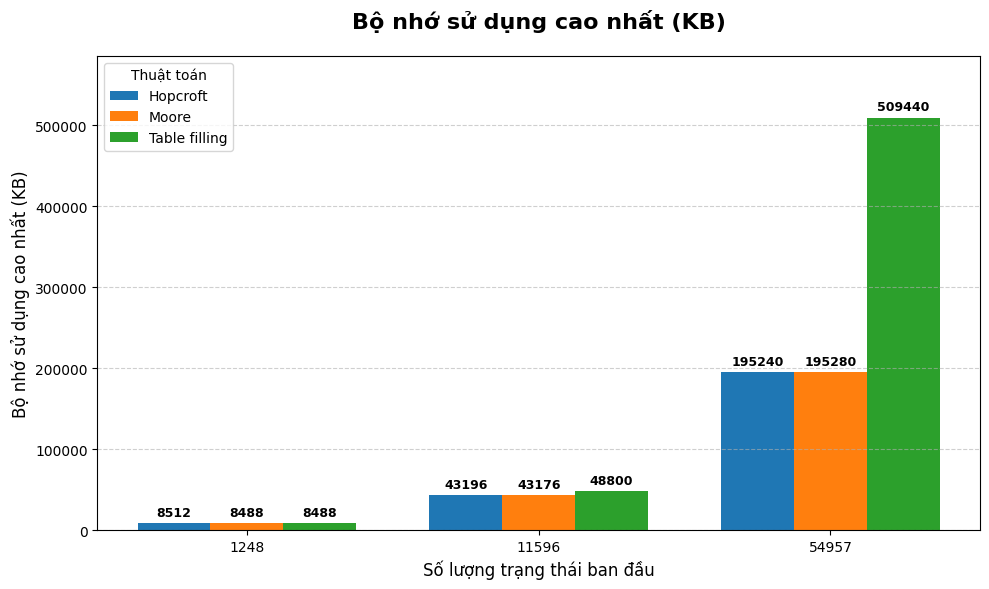

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1. Chuẩn bị dữ liệu ---
data = {
    'Input_Size': ['1248', '11596', '54957'] * 3,
    'Algorithm': ['Hopcroft']*3 + ['Moore']*3 + ['Table filling']*3,
    'Time_ms': [2173.85, 3336.12, 9175.41, 
                2669.96, 3445.87, 9475.63, 
                1678.56, 4148.50, 13609.61],
    'Avg_Mem_KB': [8512.35, 21480.74, 70240.12, 
                   8488.96, 21460.28, 68780.48, 
                   8488.22, 23400.39, 109864.90],
    'Max_Mem_KB': [8512, 43196, 195240, 
                   8488, 43176, 195280, 
                   8488, 48800, 509440]
}

df = pd.DataFrame(data)

# Cấu hình các chỉ số
metrics_config = [
    ('Time_ms', 'Thời gian thực thi trung bình (ms)', '{:.1f}'), 
    ('Avg_Mem_KB', 'Bộ nhớ sử dụng trung bình (KB)', '{:.0f}'), 
    ('Max_Mem_KB', 'Bộ nhớ sử dụng cao nhất (KB)', '{:.0f}')
]

# Thứ tự trục X
labels = ['1248', '11596', '54957']
x = np.arange(len(labels))  # Vị trí nhãn trên trục X: [0, 1, 2]
width = 0.25  # Độ rộng của mỗi cột

# --- 2. Hàm hỗ trợ gắn số lên đầu cột ---
def autolabel(rects, ax, fmt):
    """Gắn nhãn số liệu lên đỉnh mỗi cột"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(fmt.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset (dịch lên trên 1 chút)
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold', color='black')

# --- 3. Vẽ biểu đồ ---
for metric_col, metric_title, fmt in metrics_config:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Lấy dữ liệu riêng cho từng thuật toán để vẽ cột nhóm
    vals_hopcroft = df[df['Algorithm'] == 'Hopcroft'][metric_col].values
    vals_moore = df[df['Algorithm'] == 'Moore'][metric_col].values
    vals_table = df[df['Algorithm'] == 'Table filling'][metric_col].values
    
    # Vẽ 3 cột nằm cạnh nhau
    # Cột Hopcroft nằm bên trái tâm (x - width)
    rects1 = ax.bar(x - width, vals_hopcroft, width, label='Hopcroft', color='#1f77b4')
    # Cột Moore nằm ngay tâm (x)
    rects2 = ax.bar(x, vals_moore, width, label='Moore', color='#ff7f0e')
    # Cột Table filling nằm bên phải tâm (x + width)
    rects3 = ax.bar(x + width, vals_table, width, label='Table filling', color='#2ca02c')
    
    # Thêm số liệu lên đỉnh cột
    autolabel(rects1, ax, fmt)
    autolabel(rects2, ax, fmt)
    autolabel(rects3, ax, fmt)
    
    # Trang trí
    ax.set_title(f"{metric_title}", fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel("Số lượng trạng thái ban đầu", fontsize=12)
    ax.set_ylabel(metric_title, fontsize=12)
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(title='Thuật toán')
    ax.grid(axis='y', linestyle='--', alpha=0.6) # Chỉ kẻ lưới ngang
    
    # Tăng giới hạn trục Y lên 1 chút để số liệu trên cột cao nhất không bị mất
    ax.set_ylim(0, df[metric_col].max() * 1.15)
    
    plt.tight_layout()
    plt.show()